In [66]:
import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [100]:
df = pd.read_csv('./adf.csv')
df

,phi / Degrees,Si Si Si,Si Si O,Si O Si,Si O O,O Si O,O O O
0,1,0.0,0.0,0.000000,0.0,0.0,0.000000
1,2,0.0,0.0,0.000000,0.0,0.0,0.000000
2,3,0.0,0.0,0.000000,0.0,0.0,0.000000
3,4,0.0,0.0,0.000000,0.0,0.0,0.000000
4,5,0.0,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...
175,176,0.0,0.0,0.000000,0.0,0.0,0.000000
176,177,0.0,0.0,0.000000,0.0,0.0,0.000000
177,178,0.0,0.0,0.000000,0.0,0.0,0.000000
178,179,0.0,0.0,46.995549,0.0,0.0,14.159129


In [99]:
t_df = df.T
t_df.columns += 1
t_df.drop(['phi  /  Degrees'], inplace=True)
t_df.reset_index(inplace=True)
t_df.rename(columns={
    'index': 'bond'
}, inplace=True)
t_df

,bond,1,2,3,4,5,6,7,8,9,...,171,172,173,174,175,176,177,178,179,180
0,Si Si Si,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,Si Si O,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,Si O Si,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,46.995549,0.0
3,Si O O,0.0,0.0,0.0,0.0,0.0,0.047113,0.0,0.0,0.0,...,0.0,0.0,0.047113,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,O Si O,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
5,O O O,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,14.159129,0.0


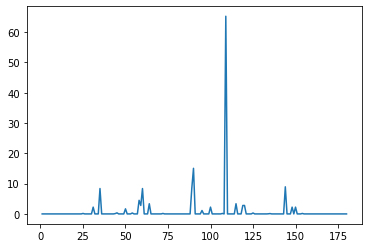

In [36]:
df.columns
plt.plot(df['phi  /  Degrees'], df['Si Si Si'])

In [65]:
TARGET_DIR = '/Users/y1u0d2/desktop/Lab/result/adf'
with open('/Users/y1u0d2/desktop/Lab/data/n2p2_input/convert_unit/input.data', mode='r') as f:
    lines = [line.strip() for line in f.readlines()]
    structure = []
    lattice = []
    atom = []
    for i, line in enumerate(lines):
        if (not i == 0 and 'begin' in line) or i+1 == len(lines):
            # print(comment)
            n_structure = comment.split(' ')[1].split(':')[-1]
            idx = comment.split(' ')[-1].split(':')[-1][:-1]

            lattice = [' '.join(i.split(' ')[1:]) for i in lattice]
            with open(f'{TARGET_DIR}/lattice/{n_structure}_{idx}.txt', 'w') as lat_f:
                for tmp in lattice:
                    lat_f.write(f'{tmp}\n')

            def arrange_atom(arr):
                arr = arr.split(' ')[1:5]
                atom_type = arr[-1]
                coord = arr[:3]
                coord.insert(0,atom_type)
                return ' '.join(coord)
            atom = [arrange_atom(tmp) for tmp in atom]
            natom = len(atom)
            # print(atom)
            with open(f'{TARGET_DIR}/coord/{n_structure}_{idx}.xyz', 'w') as coord_f:
                coord_f.write(f'{str(natom)}\n')
                coord_f.write(f'{comment}\n')
                for tmp in atom:
                    coord_f.write(f'{tmp}\n')

            # 初期化
            structure = []
            lattice = []
            atom = []
        if 'comment' in line:
            comment = line

        if 'lattice' in line:
            lattice.append(line)

        if 'atom' in line:
            atom.append(line)

        structure.append(line)

In [60]:
tmp = 'comment structure:alpha-critobalite structure_idx:500.'
tmp.split(' ')
n_structure = tmp.split(' ')[1].split(':')[-1]
idx = tmp.split(' ')[-1].split(':')[-1][:-1]

In [139]:
import glob
CSV_DIR = '/Users/y1u0d2/desktop/Lab/result/adf/wip/csv'
all_csv = glob.glob(f'{CSV_DIR}/*.csv')
df = pd.read_csv(all_csv[0])
for f in all_csv[1:]:
   tmp =  pd.read_csv(f)
   df = pd.concat([df, tmp])


/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  import sys
/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: Futur

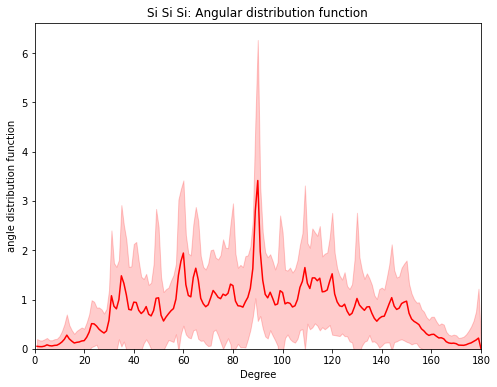

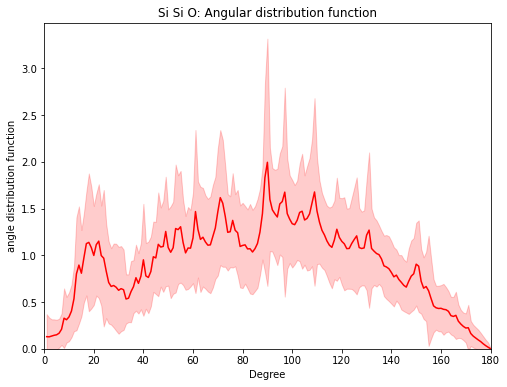

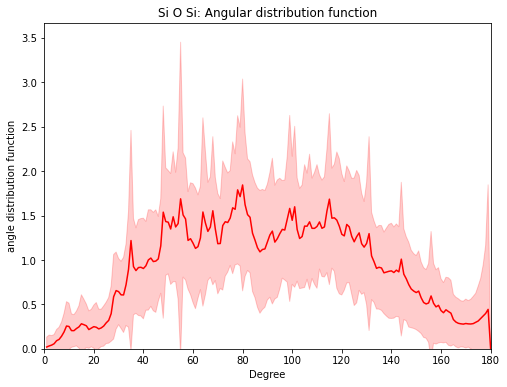

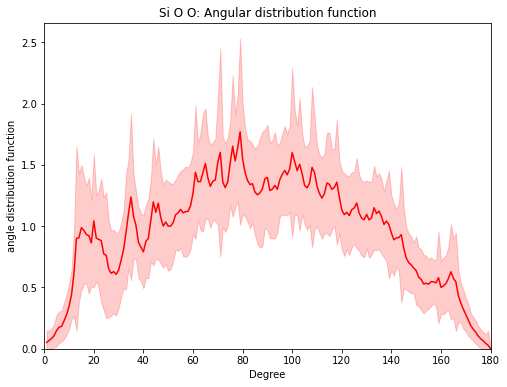

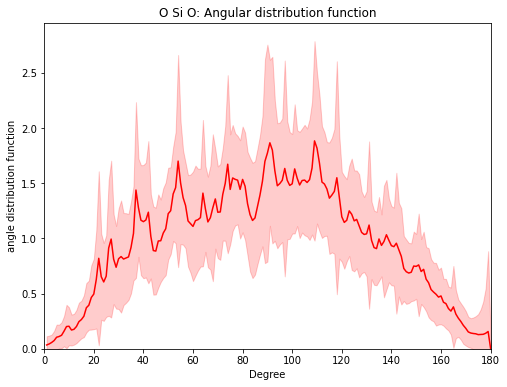

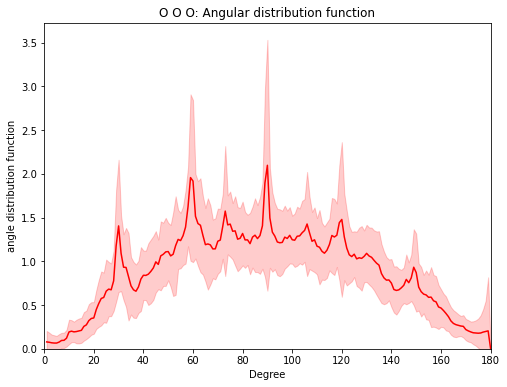

In [141]:
df.to_csv('/Users/y1u0d2/desktop/Lab/result/adf/wip/all.csv', index=False)
SAVE_DIR = '/Users/y1u0d2/desktop/Lab/result/adf/wip/pic'
df = pd.read_csv('/Users/y1u0d2/desktop/Lab/result/adf/wip/all.csv')
pairs = df['Atom pairs'].unique()
for pair in pairs:
    df_pair = df[df['Atom pairs'] == pair]
    mean = df_pair.mean()[2:]
    std = df_pair.std()[2:]
    plt.figure(figsize=(8,6))
    plt.fill_between(range(1,181), mean + std, mean - std, alpha=0.2, color='red')
    plt.xlim(0,180)
    plt.ylim(0,)
    plt.title(f'{pair}: Angular distribution function')
    plt.xlabel('Degree')
    plt.ylabel('angle distribution function')
    plt.plot(range(1,181), mean, color='red')
    plt.savefig(f'{SAVE_DIR}/{pair}.png')

In [145]:
df = pd.read_csv('/Users/y1u0d2/desktop/Lab/result/adf/wip/all.csv')

/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/y1u0d2/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


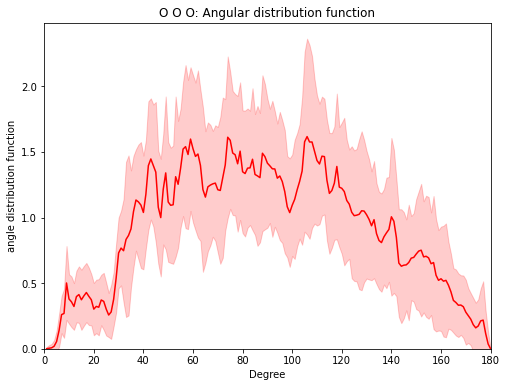

In [151]:
df_quartz = df[(df.structure == 'alpha-quartz') & (df['Atom pairs'] == 'Si O Si')]
df_quartz
mean = df_quartz.mean()[2:]
std = df_quartz.std()[2:]
plt.figure(figsize=(8,6))
plt.fill_between(range(1,181), mean + std, mean - std, alpha=0.2, color='red')
plt.xlim(0,180)
plt.ylim(0,)
plt.title(f'{pair}: Angular distribution function')
plt.xlabel('Degree')
plt.ylabel('angle distribution function')
plt.plot(range(1,181), mean, color='red')